In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('/Users/stevengeorge/Documents/Github/fpl-analysis/')

__TODO: Rename gw DataFrame to gw2 or generic name__ 

In [2]:
gw1_v1_player_predictions = pd.read_parquet(r'data/gw_predictions/gw13_v2_lstm_player_predictions.parquet')
print(gw1_v1_player_predictions.shape)
gw1_v1_player_predictions.head()

(538, 13)


,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,sum
0,raheem_sterling,5.002057,4.823120,4.816916,4.744115,4.592945,0,0,0,1,Manchester City,12.0,23.979154
1,kevin_de bruyne,4.975854,4.798008,4.791866,4.719283,4.569014,0,0,0,1,Manchester City,10.2,23.854025
2,sadio_mané,4.872322,4.692422,4.683348,4.610119,4.463084,0,0,0,1,Liverpool,12.1,23.321295
3,mohamed_salah,4.802007,4.639170,4.637746,4.571448,4.425952,0,0,0,1,Liverpool,12.3,23.076322
4,tammy_abraham,4.235990,4.089609,4.087154,4.027077,3.898896,0,1,0,0,Chelsea,8.0,20.338726


In [3]:
gw1_v1_player_predictions.rename(columns={'sum': 'predictions'}, inplace=True)

In [4]:
plot_df = pd.melt(gw1_v1_player_predictions[['name', 'GW_plus_1', 'GW_plus_2', 'GW_plus_3', 'GW_plus_4', 'GW_plus_5']], id_vars=['name'])
plot_df.rename(columns={'variable': 'GW', 'value': 'prediction'}, inplace=True)
plot_df.head()

,name,GW,prediction
0,raheem_sterling,GW_plus_1,5.002057
1,kevin_de bruyne,GW_plus_1,4.975854
2,sadio_mané,GW_plus_1,4.872322
3,mohamed_salah,GW_plus_1,4.802007
4,tammy_abraham,GW_plus_1,4.235990


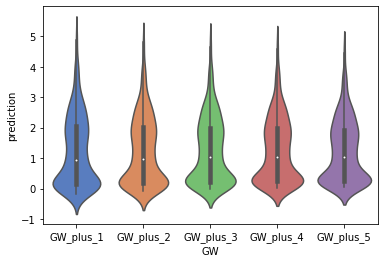

In [5]:
sns.violinplot(x="GW", y="prediction", data=plot_df, palette="muted", split=True)

In [6]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

In [7]:
gw12_team_selection = pd.read_parquet('data/gw_team_selections/gw12_v2_lstm_team_selections.parquet')
gw12_team_selection['in_current_team'] = 1
gw12_team_selection

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11,in_current_team
0,raheem_sterling,4.998995,4.823801,4.819527,4.748356,4.597197,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
1,kevin_de_bruyne,4.929100,4.760020,4.757558,4.688653,4.539475,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
2,sadio_mané,4.825116,4.652982,4.647032,4.577020,4.431107,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
3,andrew_robertson,3.833608,3.699806,3.697444,3.642606,3.526678,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
4,virgil_van_dijk,3.673564,3.553037,3.555364,3.506126,3.394583,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
5,raúl_jiménez,3.478771,3.343724,3.333781,3.278163,3.174207,0,1,0,0,...,0,0,0,0,0,0,0,1,1.0,1
6,john_lundstram,3.449338,3.301708,3.284939,3.224227,3.121772,1,0,0,0,...,0,0,1,0,0,0,0,0,1.0,1
7,john_mcginn,3.299668,3.179851,3.175081,3.125287,3.026680,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
8,mathew_ryan,3.068682,2.976161,2.977264,2.935485,2.845920,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
9,danny_ings,2.701244,2.649102,2.659438,2.629913,2.554112,0,1,0,0,...,0,0,0,1,0,0,0,0,1.0,1


In [8]:
gw1_team = list(gw12_team_selection['name'])
gw1_team

['raheem_sterling',
 'kevin_de_bruyne',
 'sadio_mané',
 'andrew_robertson',
 'virgil_van_dijk',
 'raúl_jiménez',
 'john_lundstram',
 'john_mcginn',
 'mathew_ryan',
 'danny_ings',
 'jordan_ayew',
 'diego_rico',
 'lewis_dunk',
 'todd_cantwell',
 'david_button']

In [9]:
len(gw1_team)

15

In [10]:
gw1_team_df = pd.DataFrame(
    {
        'name': gw1_team
    }
)
gw1_team_df['in_gw_1_team'] = 1

# Need to format here given that this was done at points prediction stage
gw1_team_df['name'] = gw1_team_df['name'].str.replace(' ', '_')
gw1_team_df['name'] = gw1_team_df['name'].str.replace('-', '_')

gw1_team_df

,name,in_gw_1_team
0,raheem_sterling,1
1,kevin_de_bruyne,1
2,sadio_mané,1
3,andrew_robertson,1
4,virgil_van_dijk,1
5,raúl_jiménez,1
6,john_lundstram,1
7,john_mcginn,1
8,mathew_ryan,1
9,danny_ings,1


In [11]:
gw1_v1_player_predictions = gw1_v1_player_predictions.merge(gw1_team_df, on='name', how='left')
gw1_v1_player_predictions['in_gw_1_team'] = gw1_v1_player_predictions['in_gw_1_team'].fillna(0)
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,predictions,in_gw_1_team
0,raheem_sterling,5.002057,4.823120,4.816916,4.744115,4.592945,0,0,0,1,Manchester City,12.0,23.979154,1.0
1,kevin_de_bruyne,4.975854,4.798008,4.791866,4.719283,4.569014,0,0,0,1,Manchester City,10.2,23.854025,1.0
2,sadio_mané,4.872322,4.692422,4.683348,4.610119,4.463084,0,0,0,1,Liverpool,12.1,23.321295,1.0
3,mohamed_salah,4.802007,4.639170,4.637746,4.571448,4.425952,0,0,0,1,Liverpool,12.3,23.076322,0.0
4,tammy_abraham,4.235990,4.089609,4.087154,4.027077,3.898896,0,1,0,0,Chelsea,8.0,20.338726,0.0


In [12]:
gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1][['name', 'next_match_value']]

,name,next_match_value
0,raheem_sterling,12.0
1,kevin_de_bruyne,10.2
2,sadio_mané,12.1
13,andrew_robertson,7.0
18,virgil_van_dijk,6.4
20,raúl_jiménez,7.3
22,john_lundstram,4.9
27,mathew_ryan,4.7
30,john_mcginn,5.8
54,danny_ings,6.0


In [13]:
# Override values which are incorrect for current players:
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'kevin_de_bruyne', 'next_match_value'] = 10.1
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'john_lundstram', 'next_match_value'] = 4.6
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'danny_ings', 'next_match_value'] = 5.9

In [14]:
# Expert judgement - don't want Pukki anymore
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'teemu_pukki', 'predictions'] = -99

# Long suspension
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'jorge_luiz_frello_filho', 'predictions'] = -99

# 25% chance of playing
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'david_silva', 'predictions'] = -99

# Left for China
#gw1_v1_player_predictions.loc[gw1_v1_player_predictions['name'] == 'marko_arnautovic', 'predictions'] = -99

In [15]:
gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1]['next_match_value'].sum()

98.99999999999997

__Note: Budget when everyone sold is 98.4 on website__

__Create top 3 flag__

In [16]:
gw1_v1_player_predictions.loc[0:2, 'in_top_3'] = 1

In [17]:
gw1_v1_player_predictions['in_top_3'].fillna(0, inplace=True)

__Create low value player flag__

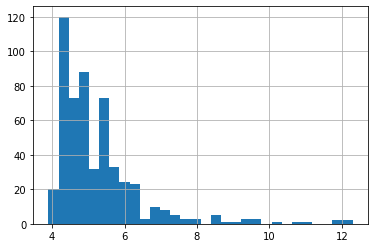

In [18]:
gw1_v1_player_predictions['next_match_value'].hist(bins=30)

In [19]:
gw1_v1_player_predictions[gw1_v1_player_predictions['next_match_value'] < 4.1].shape

(19, 15)

In [20]:
gw1_v1_player_predictions['low_value_player'] = np.where(
    gw1_v1_player_predictions['next_match_value'] < 4.1,
    1,
    0
)

In [21]:
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,team_name,next_match_value,predictions,in_gw_1_team,in_top_3,low_value_player
0,raheem_sterling,5.002057,4.823120,4.816916,4.744115,4.592945,0,0,0,1,Manchester City,12.0,23.979154,1.0,1.0,0
1,kevin_de_bruyne,4.975854,4.798008,4.791866,4.719283,4.569014,0,0,0,1,Manchester City,10.2,23.854025,1.0,1.0,0
2,sadio_mané,4.872322,4.692422,4.683348,4.610119,4.463084,0,0,0,1,Liverpool,12.1,23.321295,1.0,1.0,0
3,mohamed_salah,4.802007,4.639170,4.637746,4.571448,4.425952,0,0,0,1,Liverpool,12.3,23.076322,0.0,0.0,0
4,tammy_abraham,4.235990,4.089609,4.087154,4.027077,3.898896,0,1,0,0,Chelsea,8.0,20.338726,0.0,0.0,0


In [22]:
budget = gw1_v1_player_predictions[gw1_v1_player_predictions['in_gw_1_team'] == 1]['next_match_value'].sum()
#budget = budget + 0.1  # money in the bank
budget

98.99999999999997

In [23]:
#budget = 98.8
#budget

## Pick team

In [24]:
from pulp import *

In [25]:
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace(' ', '_')
gw1_v1_player_predictions['name'] = gw1_v1_player_predictions['name'].str.replace('-', '_')

In [26]:
team_names = gw1_v1_player_predictions['team_name'].unique()
gw1_v1_player_predictions = pd.get_dummies(gw1_v1_player_predictions, columns=['team_name'])
gw1_v1_player_predictions.head()

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,raheem_sterling,5.002057,4.823120,4.816916,4.744115,4.592945,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,kevin_de_bruyne,4.975854,4.798008,4.791866,4.719283,4.569014,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,sadio_mané,4.872322,4.692422,4.683348,4.610119,4.463084,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,mohamed_salah,4.802007,4.639170,4.637746,4.571448,4.425952,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,tammy_abraham,4.235990,4.089609,4.087154,4.027077,3.898896,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
players = list(gw1_v1_player_predictions['name'])

In [28]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            gw1_v1_player_predictions['name'],
            gw1_v1_player_predictions[f'team_name_{team}']
        )
    
    )

In [29]:
costs = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['next_match_value']
    )
)

In [30]:
predictions = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['predictions']
    )
)

In [31]:
DEF_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_FWD']
    )
)

GK_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_GK']
    )
)

MID_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['position_MID']
    )
)

In [32]:
GW1_team = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_gw_1_team']
    )
)

In [33]:

in_top_3 = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['in_top_3']
    )
)


In [34]:
low_value_flag = dict(
    zip(
        gw1_v1_player_predictions['name'],
        gw1_v1_player_predictions['low_value_player']
    )
)

In [35]:
prob = LpProblem('FPL team selection', LpMaximize)

In [36]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [37]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

## TODO: Need to work out what deduction is made on sales
Currently have to add 0.1 to budget constraint so that same team is selected

In [38]:
# Constraints
prob += lpSum([costs[p] * player_vars[p] for p in players]) <= budget, "Total cost less than X"

prob += lpSum([costs[p] * player_vars[p] for p in players]) >= (budget - 0.4), "Total cost greater than X"

prob += lpSum(player_vars[p] for p in players) == 15, "Select 15 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) == 5, "5 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 2, "2 goalkeepers"

prob += lpSum(MID_flag[p] * player_vars[p] for p in players) == 5, "5 midfielders"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) == 3, "3 forwards"

#prob += lpSum(in_top_3[p] * player_vars[p] for p in players) == 3, "Top 3 must be included"

prob += lpSum(low_value_flag[p] * player_vars[p] for p in players) == 1, "Include 1 low value player"

prob += lpSum(GW1_team[p] * player_vars[p] for p in players) >= 14, "at least X from original team i.e. max (15-X) transfers allowed"

for team in team_dict.keys():
    prob += lpSum(team_dict[team][p] * player_vars[p] for p in players) <= 3, f"Max 3 players in the same {team}"

In [39]:
prob.solve()

1

In [40]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_andrew_robertson = 1.0
player_danny_ings = 1.0
player_david_button = 1.0
player_diego_rico = 1.0
player_john_lundstram = 1.0
player_john_mcginn = 1.0
player_jordan_ayew = 1.0
player_kevin_de_bruyne = 1.0
player_lewis_dunk = 1.0
player_mathew_ryan = 1.0
player_raheem_sterling = 1.0
player_raúl_jiménez = 1.0
player_sadio_mané = 1.0
player_todd_cantwell = 1.0
player_virgil_van_dijk = 1.0


In [41]:
test_selection = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,raheem_sterling,5.002057,4.823120,4.816916,4.744115,4.592945,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,kevin_de_bruyne,4.975854,4.798008,4.791866,4.719283,4.569014,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,sadio_mané,4.872322,4.692422,4.683348,4.610119,4.463084,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,andrew_robertson,3.844630,3.709141,3.705965,3.650398,3.534229,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,virgil_van_dijk,3.646575,3.524620,3.525568,3.475688,3.365125,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,raúl_jiménez,3.603606,3.458661,3.446052,3.386789,3.278966,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
22,john_lundstram,3.514491,3.362938,3.345415,3.283065,3.178625,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27,mathew_ryan,3.370508,3.234675,3.222902,3.166953,3.066524,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30,john_mcginn,3.116480,3.026480,3.030164,2.989656,2.898179,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
54,danny_ings,2.771932,2.696508,2.699136,2.662507,2.583597,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
test_selection.sum()

name                                 raheem_sterlingkevin_de_bruynesadio_manéandrew...
GW_plus_1                                                                      49.1445
GW_plus_2                                                                       47.705
GW_plus_3                                                                      47.7577
GW_plus_4                                                                      47.1114
GW_plus_5                                                                      45.6799
position_DEF                                                                         5
position_FWD                                                                         3
position_GK                                                                          2
position_MID                                                                         5
next_match_value                                                                    99
predictions                                

In [43]:
if test_selection.sum()['in_gw_1_team'] == 15:
    print("No transfers made.")
else:
    print(f"{15 - test_selection.sum()['in_gw_1_team']} transfers made.")
    print('\n')
    print(test_selection[test_selection['in_gw_1_team'] == 0]['name'])

No transfers made.


In [44]:
test_selection[test_selection['low_value_player'] == 1]

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
276,david_button,0.890479,0.942909,0.989491,1.004404,0.989281,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Starting 11

In [45]:
# Player suspended
test_selection.loc[test_selection['name'] == 'lewis_dunk', 'predictions'] = -1

/anaconda3/envs/fpl_analysis/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
players = list(test_selection['name'])

In [47]:
team_dict = {}

for team in team_names:
    team_dict[team] = dict(
        zip(
            test_selection['name'],
            test_selection[f'team_name_{team}']
        )
    
    )

In [48]:
costs = dict(
    zip(
        test_selection['name'],
        test_selection['next_match_value']
    )
)

In [49]:
predictions = dict(
    zip(
        test_selection['name'],
        test_selection['predictions']
    )
)

In [50]:
DEF_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_DEF']
    )
)

FWD_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_FWD']
    )
)

GK_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_GK']
    )
)

MID_flag = dict(
    zip(
        test_selection['name'],
        test_selection['position_MID']
    )
)

In [51]:
prob = LpProblem('FPL team selection', LpMaximize)

In [52]:
player_vars = LpVariable.dicts('player', players, 0, 1, LpInteger)

In [53]:
# Objective function:
prob += lpSum([predictions[p] * player_vars[p] for p in players]), "Total predicted points"

In [54]:
# Constraints

prob += lpSum(player_vars[p] for p in players) == 11, "Select 11 players"

prob += lpSum(DEF_flag[p] * player_vars[p] for p in players) >= 3, "At least 3 defenders"

prob += lpSum(GK_flag[p] * player_vars[p] for p in players) == 1, "1 goalkeeper"

prob += lpSum(FWD_flag[p] * player_vars[p] for p in players) >= 1, "At least 1 forward"

In [55]:
prob.solve()

1

In [56]:
chosen_players = []
for v in prob.variables():
    if v.varValue == 0:
        continue
    else:
        print(v.name, "=", v.varValue)
        chosen_players.append(v.name.replace('player_', ''))

player_andrew_robertson = 1.0
player_danny_ings = 1.0
player_john_lundstram = 1.0
player_john_mcginn = 1.0
player_jordan_ayew = 1.0
player_kevin_de_bruyne = 1.0
player_mathew_ryan = 1.0
player_raheem_sterling = 1.0
player_raúl_jiménez = 1.0
player_sadio_mané = 1.0
player_virgil_van_dijk = 1.0


In [57]:
test_selection_11 = gw1_v1_player_predictions[
    gw1_v1_player_predictions['name'].isin(
        chosen_players
    )
]
test_selection_11

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester City,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers
0,raheem_sterling,5.002057,4.823120,4.816916,4.744115,4.592945,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,kevin_de_bruyne,4.975854,4.798008,4.791866,4.719283,4.569014,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,sadio_mané,4.872322,4.692422,4.683348,4.610119,4.463084,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,andrew_robertson,3.844630,3.709141,3.705965,3.650398,3.534229,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,virgil_van_dijk,3.646575,3.524620,3.525568,3.475688,3.365125,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,raúl_jiménez,3.603606,3.458661,3.446052,3.386789,3.278966,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
22,john_lundstram,3.514491,3.362938,3.345415,3.283065,3.178625,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
27,mathew_ryan,3.370508,3.234675,3.222902,3.166953,3.066524,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30,john_mcginn,3.116480,3.026480,3.030164,2.989656,2.898179,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
54,danny_ings,2.771932,2.696508,2.699136,2.662507,2.583597,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
test_selection_11[test_selection_11['name'] != 'raheem_sterling']['GW_plus_1'].sum() + test_selection_11[test_selection_11['name'] == 'raheem_sterling']['GW_plus_1'].sum() * 2

46.151561975479126

In [59]:
test_selection_11 = test_selection_11.reset_index(drop=True)[['name']]
test_selection_11['starting_11'] = 1
test_selection_11

,name,starting_11
0,raheem_sterling,1
1,kevin_de_bruyne,1
2,sadio_mané,1
3,andrew_robertson,1
4,virgil_van_dijk,1
5,raúl_jiménez,1
6,john_lundstram,1
7,mathew_ryan,1
8,john_mcginn,1
9,danny_ings,1


In [60]:
gw_selection_df = test_selection.merge(
    test_selection_11,
    on=['name'],
    how='left'
)
gw_selection_df['starting_11'] = gw_selection_df['starting_11'].fillna(0)
gw_selection_df

,name,GW_plus_1,GW_plus_2,GW_plus_3,GW_plus_4,GW_plus_5,position_DEF,position_FWD,position_GK,position_MID,...,team_name_Manchester United,team_name_Newcastle United,team_name_Norwich,team_name_Sheffield Utd,team_name_Southampton,team_name_Tottenham Hotspur,team_name_Watford,team_name_West Ham United,team_name_Wolverhampton Wanderers,starting_11
0,raheem_sterling,5.002057,4.823120,4.816916,4.744115,4.592945,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
1,kevin_de_bruyne,4.975854,4.798008,4.791866,4.719283,4.569014,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
2,sadio_mané,4.872322,4.692422,4.683348,4.610119,4.463084,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
3,andrew_robertson,3.844630,3.709141,3.705965,3.650398,3.534229,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,virgil_van_dijk,3.646575,3.524620,3.525568,3.475688,3.365125,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
5,raúl_jiménez,3.603606,3.458661,3.446052,3.386789,3.278966,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1.0
6,john_lundstram,3.514491,3.362938,3.345415,3.283065,3.178625,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
7,mathew_ryan,3.370508,3.234675,3.222902,3.166953,3.066524,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
8,john_mcginn,3.116480,3.026480,3.030164,2.989656,2.898179,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
9,danny_ings,2.771932,2.696508,2.699136,2.662507,2.583597,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1.0


In [61]:
gw_selection_df[['name', 'predictions']]

,name,predictions
0,raheem_sterling,23.979154
1,kevin_de_bruyne,23.854025
2,sadio_mané,23.321295
3,andrew_robertson,18.444362
4,virgil_van_dijk,17.537576
5,raúl_jiménez,17.174073
6,john_lundstram,16.684532
7,mathew_ryan,16.061562
8,john_mcginn,15.060959
9,danny_ings,13.413681


Changed captain to Mané

In [62]:
gw_selection_df.to_parquet(r'data/gw_team_selections/gw13_v2_lstm_team_selections.parquet', index=False)